#Definición del problema

##Contexto

<center><img src="https://cdn.hobbyconsolas.com/sites/navi.axelspringer.es/public/media/image/2022/05/interstellar-endurance-2696779.jpg?tf=640x" width = "400" align="center"/></center>

<p style="text-align: justify;"> Bienvenido al año 2912, donde se necesitan habilidades de ciencia de datos para resolver un misterio cósmico. Se ha recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!</p>


##Problema

Debido a los problemas del barco solo se logró recopilar dos tercios de la informacion de los pasajeros, por ello mediante herramientas de Machine Lerning se desea predecir que pasajeros fueron trasportados de la nave para el tercio restante, se cuenta con 3 archivos que se detallan a continuación.

*  train.csv: Informacion de dos tercios de los pasajeros de la nave, donde se muestran caracteristicas del viaje de cada pasajero y se menciona si fue o no transportado.
Sus respectivas columnas son:

  *   PassengerId- Una identificación única para cada pasajero. Cada Id toma la forma gggg_pp donde gggg indica un grupo con el que viaja el pasajero y ppes su número dentro del grupo. Las personas de un grupo suelen ser miembros de la familia, pero no siempre.

  *   HomePlanet- El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

  *   CryoSleep- Indica si el pasajero optó por ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

  *   Cabin- El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde sidepuede ser tanto P para Babor como S para Estribor .

  *   Destination- El planeta al que desembarcará el pasajero.

  *   Age- La edad del pasajero.

  *   VIP- Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

  *   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Monto que el pasajero ha facturado por cada una de las muchas comodidades de lujo del Spaceship Titanic .

  *   Name- El nombre y apellidos del pasajero.

  *   Transported- Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que intentas predecir.

*  test.csv: Informacion del tercio restante de pasajeros que se desea saber si fueron transportados.

*  sample_sumission.csv: Archivo que muestra como ejemplo el tipo de salida que se espera, donde se identifica a cada pasajero si fue o no transportado.

##Carga de Datos

In [48]:
#librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #graficar
import seaborn as sns #graficar
import re
import time #para medir tiempos
from sklearn.preprocessing import StandardScaler #normalizar
from sklearn.linear_model import LinearRegression #modelo
from sklearn.svm import SVR #modelo
from sklearn.ensemble import RandomForestRegressor #modelo
from sklearn.ensemble import GradientBoostingRegressor #modelo
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Llamada al repositorio de GitHub
! git clone https://github.com/KreuzKatt/MAT281-Portfolio.git

Cloning into 'MAT281-Portfolio'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 395 (delta 48), reused 207 (delta 39), pack-reused 125
Receiving objects: 100% (395/395), 127.38 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (265/265), done.


In [4]:
#Se reopilan los datos de test.csv en un Data Frame y se visualizan las
#primeras filas para conocer con que datos se trabaja
df_test = pd.read_csv('/content/MAT281-Portfolio/data/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
#Se reopilan los datos de train.csv en un Data Frame y se visualizan las
#primeras filas para conocer con que datos se trabaja
df_train = pd.read_csv('/content/MAT281-Portfolio/data/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
#Se reopilan los datos de sample_submission.csv en un Data Frame y se visualizan las
#primeras filas para conocer los datos de salida esperados
df_sample = pd.read_csv('/content/MAT281-Portfolio/data/sample_submission.csv')
df_sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


#Estadística descriptiva

Se analizará con estadistica descriptiva el conjunto de datos de entrenamiento y testeo.

### Datos vacios

Veamos primero si existen datos vacios en cada columna, y de ser así, cuantos son.

####Datos Entrenamiento

In [7]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Se puede apreciar que existe una gran cantidada de datos vacios (posiblemente perdidos por el accidente), por ende se procederá a llenar según convenga en cada caso para poder manejar los datos de mejor manera.

---------------------------------------------------------------------

Se describe la informacion básica de cada columna, como su nombre, cuantos no vacios y tipo de dato.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


---------------------------------------------------------------------

De ser posible se analiza por cada columna algunas de sus medidadas de dispersión, sumas totales, cuartiles, máximos y mínimos .

In [9]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


En base a lo visto en esta seccion de estaditica descriptiva podemos notar principalmente la necesidad de trabajar los datos vacios, además de que hay columnas las cuales pueden ser transformadas a valores numéricos para procesar sus datos (como es el caso de HomePlanet, VIP y Transported).

También se puede crear nuevas columnas individuales para los grupos entregados por PassengerId y separar la información de Cabin para tener un análisis más específico del caso de teletransportación.

####Datos Testeo

In [31]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

---------------------------------------------------------------------

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   int64  
 15  Deck          8693 non-null   object 
 16  Num           8693 non-null   int64  
 17  Side          8693 non-null   object 
dtypes: bool(3), float64(6), int6

---------------------------------------------------------------------

In [33]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.213735,219.988496,448.412976,169.548372,304.567813,298.240193,4633.389624,586.601173
std,14.951705,660.526002,1595.796550,598.013969,1125.568266,1134.132115,2671.028856,513.906241
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,152.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,407.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,6883.000000,983.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,1894.000000


El analisis para el conjuto de datos de testeo es similar a los del conjutno de datos de Entrenamientos por lo que se obviarán.

#Visualización descriptiva

**NOTA:** Por practicidad solo se realizará a los datos de Entrenamiento.

Comencemos visualizando algunos gráficos que podrían ser de utilidad para un análisis previo.

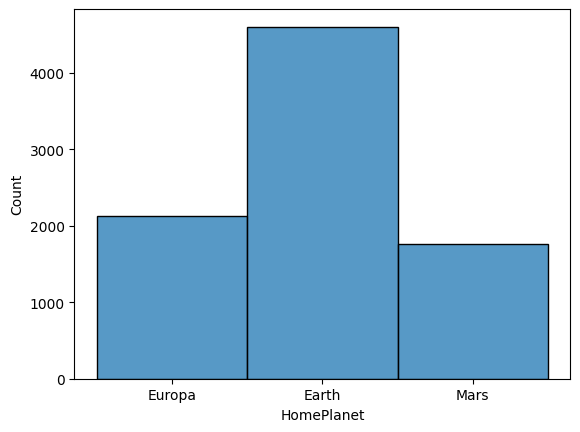

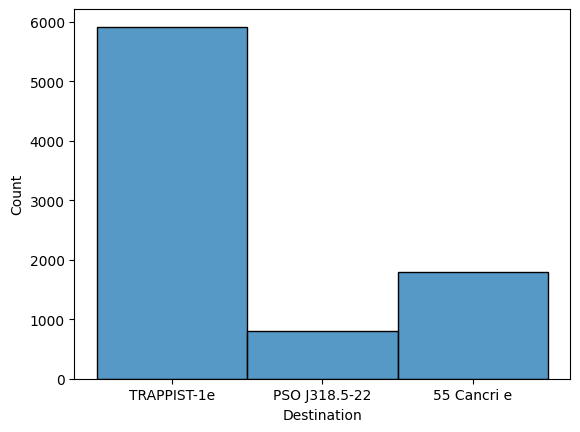

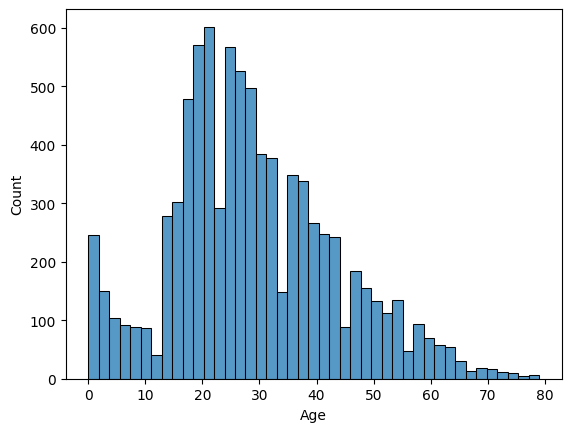

In [10]:
inter = ['HomePlanet', 'Destination', 'Age'] #Descartadas momentaneamente 'CryoSleep', 'VIP', 'Transported'
for col in inter:
  sns.histplot(x = df_train[col])
  plt.show()

De aquí se se puede rescatar que la mayotía de los usuarios provienen de la tierra, se dirigian a TRAPPIST-1e y tienen una edad cercana a los 22 años (No necesariamente cumpliendo las tres al mismo tiempo).

<Axes: >

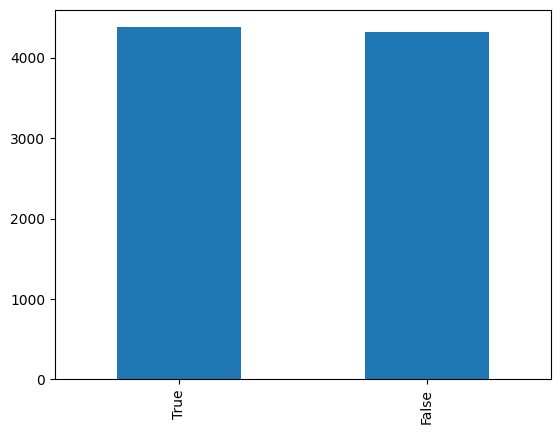

In [11]:
plot = df_train.Transported.value_counts()
plot.plot(kind="bar")

De este último gráfico podemos conluir de la la gravedad del problema, ya que de los datos de entrenamiento, al rededor de la mitad de los pasajeros desaparecieron luego del accidente.

#Preprocesamiento

Como se cambiarán algunos datos de los Dataframes se crearán unos de respaldo por si es que se llegase a necesitar.

In [35]:
df_train_res = df_train
df_test_res = df_test

Primero se solucionará para cada columna el problema de los valores vacios segun el siguiente criterio:


*   HomePlanet- "N"

*   CryoSleep- "False"

*   Cabin- "-/-1/-"

*   Destination- "N"

*   Age-"-1"

*   VIP- "False"

*   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- "-1"

*   Name- "N"

Al rellenar los datos de esta forma no perdemos el hecho de que faltan datos y a la vez no entorpecen el analisis de problema.

In [36]:
vacios = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
          'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
          'Name']

vacios_dic = {'HomePlanet' : 'N', 'CryoSleep' : False, 'Cabin' : '-/-1/-', 'Destination' : 'N', 'Age' : -1,
       'VIP' : False, 'RoomService' : -1, 'FoodCourt' : -1, 'ShoppingMall' : -1, 'Spa' : -1, 'VRDeck' : -1,
       'Name' : 'N'}


for col in vacios:
  df_train[col] = df_train[col].fillna(vacios_dic[col])
  df_test[col] = df_test[col].fillna(vacios_dic[col])

Revisamos que se haya cumplido las tareas de rellenado de vacios

In [14]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [37]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

Una vez solucionado el probema de los datos vacios se procederá a separar los datos de "PassengerId" y "Cabin" para un analisis más detallado.

In [15]:
#Datos de Entrenamiento
grupo = [0] #Separar Por Grupo
decks = [0] #Separar Por Deck
nums = [0] #Separar Por Num
sides = [0] #Separar Por Side

for i in range(df_train.shape[0]):
  grupo.append(int(df_train['PassengerId'][i][0:4]))
  decks.append(df_train['Cabin'][i][0:1])
  nums.append([int(s) for s in re.findall(r'-?\d+\.?\d*', df_train['Cabin'][i])][0])
  sides.append(df_train['Cabin'][i][-1:])

grupo.remove(0)
decks.remove(0)
nums.remove(0)
sides.remove(0)

df_train['Group'] = grupo
df_train['Deck'] = decks
df_train['Num'] = nums
df_train['Side'] = sides

In [38]:
#Datos de Testeo
grupo = [0] #Separar Por Grupo
decks = [0] #Separar Por Deck
nums = [0] #Separar Por Num
sides = [0] #Separar Por Side

for i in range(df_test.shape[0]):
  grupo.append(int(df_test['PassengerId'][i][0:4]))
  decks.append(df_test['Cabin'][i][0:1])
  nums.append([int(s) for s in re.findall(r'-?\d+\.?\d*', df_test['Cabin'][i])][0])
  sides.append(df_test['Cabin'][i][-1:])

grupo.remove(0)
decks.remove(0)
nums.remove(0)
sides.remove(0)

df_test['Group'] = grupo
df_test['Deck'] = decks
df_test['Num'] = nums
df_test['Side'] = sides

Se visualizan los DataFrame luego de incorporar las nuevas columnas.

In [16]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,1,S


In [39]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S


## Transformacion de Datos

###Variables categoricas a variables numericas

**NOTA IMPORTATE:** Apartir de este punto las variables terminadas en "te" se asocian a los datos de testeo.

In [42]:
#Separamos el DataFrame en las VAriables CAtegoricas y numéricas que VAYAMOS A UTILIZAR
#(Se descartarán las que no)
cat_val = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side']
catte_val = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
num_val = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Num']
df_num = df_train[num_val]
df_cat = df_train[cat_val]
df_numte = df_test[num_val]
df_catte = df_test[catte_val]
df_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,False,False,B,P
1,Earth,False,TRAPPIST-1e,False,True,F,S
2,Europa,False,TRAPPIST-1e,True,False,A,S
3,Europa,False,TRAPPIST-1e,False,False,A,S
4,Earth,False,TRAPPIST-1e,False,True,F,S


In [50]:
#Datos de Entrenamiento
df_cat2 = df_cat
print('Metodo de Clasificacion:')

for col in df_cat.columns:
  print(f'\n Para la columna {col}:')
  ndf_cat = pd.get_dummies(df_cat[col])
  i = 0
  for subcol in ndf_cat.columns:
    print("{:<30} \t = {:<5}".format(subcol, i))
    i += 1

  for fil in range(len(df_cat)):
    df_cat2.loc[fil, col]= list(ndf_cat.iloc[fil]).index(1)

#Datos de Testeo
df_catte2 = df_catte

for col in df_catte.columns:
  ndf_catte = pd.get_dummies(df_catte[col])

  for fil in range(len(df_catte)):
    df_catte2.loc[fil, col]= list(ndf_catte.iloc[fil]).index(1)

Metodo de Clasificacion:

 Para la columna HomePlanet:
Earth                          	 = 0    
Europa                         	 = 1    
Mars                           	 = 2    
N                              	 = 3    

 Para la columna CryoSleep:
0                              	 = 0    
1                              	 = 1    

 Para la columna Destination:
55 Cancri e                    	 = 0    
N                              	 = 1    
PSO J318.5-22                  	 = 2    
TRAPPIST-1e                    	 = 3    

 Para la columna VIP:
0                              	 = 0    
1                              	 = 1    

 Para la columna Transported:
0                              	 = 0    
1                              	 = 1    

 Para la columna Deck:
-                              	 = 0    
A                              	 = 1    
B                              	 = 2    
C                              	 = 3    
D                              	 = 4    
E                           

In [21]:
#Dataframe de las variables categoricas pasado a variables numericas bajo el criterio impreso anteriormente
df_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Side
0,1,0,3,0,0,2,1
1,0,0,3,0,1,6,2
2,1,0,3,1,0,1,2
3,1,0,3,0,0,1,2
4,0,0,3,0,1,6,2


In [51]:
#concatenamos dataframes
df_procesado = pd.concat([df_num, df_cat], axis=1)
df_procesadote = pd.concat([df_numte, df_catte], axis=1)
df_procesado.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Side
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,3,0,0,2,1
1,24.0,109.0,9.0,25.0,549.0,44.0,2,0,0,0,3,0,1,6,2
2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,0,1,0,3,1,0,1,2
3,33.0,0.0,1283.0,371.0,3329.0,193.0,3,0,1,0,3,0,0,1,2
4,16.0,303.0,70.0,151.0,565.0,2.0,4,1,0,0,3,0,1,6,2


In [52]:
df_procesadote.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,27.0,0.0,0.0,0.0,0.0,0.0,13,3,0,1,3,0,7,2
1,19.0,0.0,9.0,0.0,2823.0,0.0,18,4,0,0,3,0,6,2
2,31.0,0.0,0.0,0.0,0.0,0.0,19,0,1,1,0,0,3,2
3,38.0,0.0,6652.0,0.0,181.0,585.0,21,1,1,0,3,0,3,2
4,20.0,10.0,0.0,635.0,0.0,0.0,23,5,0,0,3,0,6,2


###Normalizar

In [57]:
#normalizamiento
scaler = MinMaxScaler()
scaler.fit(df_procesado.drop('Transported', axis =1))

#transformamos para variables numericas
new_df = scaler.transform(df_procesado.drop('Transported', axis =1))
newte_df = scaler.transform(df_procesadote)
scaled_df = pd.DataFrame(new_df, columns= df_procesado.drop('Transported', axis =1).columns)
scaledte_df = pd.DataFrame(newte_df, columns= df_procesadote.columns)

In [59]:
scaled_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,0.5000,0.000070,0.000034,0.000043,0.000045,0.000041,0.000000,0.000528,0.333333,0.0,1.0,0.0,0.250,0.5
1,0.3125,0.007677,0.000335,0.001107,0.024544,0.001865,0.000108,0.000528,0.000000,0.0,1.0,0.0,0.750,1.0
2,0.7375,0.003071,0.119977,0.000043,0.299701,0.002072,0.000216,0.000528,0.333333,0.0,1.0,1.0,0.125,1.0
3,0.4250,0.000070,0.043067,0.015835,0.148601,0.008038,0.000216,0.000528,0.333333,0.0,1.0,0.0,0.125,1.0
4,0.2125,0.021217,0.002381,0.006470,0.025258,0.000124,0.000323,0.001055,0.000000,0.0,1.0,0.0,0.750,1.0


In [60]:
scaledte_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,0.3500,0.000070,0.000034,0.000043,0.000045,0.000041,0.001293,0.002111,0.000000,1.0,1.0,0.0,0.875,1.0
1,0.2500,0.000070,0.000335,0.000043,0.126021,0.000041,0.001832,0.002639,0.000000,0.0,1.0,0.0,0.750,1.0
2,0.4000,0.000070,0.000034,0.000043,0.000045,0.000041,0.001940,0.000528,0.333333,1.0,0.0,0.0,0.375,1.0
3,0.4875,0.000070,0.223150,0.000043,0.008122,0.024281,0.002155,0.001055,0.333333,0.0,1.0,0.0,0.375,1.0
4,0.2625,0.000768,0.000034,0.027072,0.000045,0.000041,0.002371,0.003166,0.000000,0.0,1.0,0.0,0.750,1.0


#Selección de modelo

Se seleccionarán 4 modelos diferentes:
*   Random Forest (rf)
*   Support Vector Machine (svr)
*   Gradient Boosting (GBR)
*   Regresión Lineal (linear)

NOTA: La Utilización de PCA será diferente a los otros 3 modelos.

In [61]:
X_train_var = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group', 'Num', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'Deck', 'Side']

X_train = scaled_df[X_train_var]

y_train = df_train['Transported']

X_test = scaledte_df

In [152]:
#modelos
linear_model = LinearRegression() #Modelo de Regresión Lineal
svr_model = SVR() #Modelo de Support Vector Machine
rf_model = RandomForestRegressor() #Modelo de Random Forest
GBR_model = GradientBoostingRegressor() #Modelo Gradient Boosting

##Random Forest

In [170]:
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_time = round(time.time() - start_time,3)
print(f'Tiempo demorado: {rf_time} segundos')

Tiempo demorado: 5.163 segundos


## Support Vector Machine

In [171]:
start_time = time.time()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_time = round(time.time() - start_time,3)
print(f'Tiempo demorado: {svr_time} segundos')

Tiempo demorado: 8.869 segundos


## Gradient Boosting

In [173]:
start_time = time.time()
GBR_model.fit(X_train, y_train)
GBR_pred = GBR_model.predict(X_test)
GBR_time = round(time.time() - start_time,3)
print(f'Tiempo demorado: {GBR_time} segundos')

Tiempo demorado: 2.593 segundos


##Regresión Lineal

In [172]:
start_time = time.time()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_time = round(time.time() - start_time,3)
print(f'Tiempo demorado: {linear_time} segundos')

Tiempo demorado: 0.091 segundos


#Visualizaciones del modelo

In [154]:
rf_predf = [0]
svr_predf = [0]
GBR_predf = [0]
linear_predf = [0]

for i in range(len(rf_pred)):
  rf_predf.append(bool(round(rf_pred[i])))
  svr_predf.append(bool(round(svr_pred[i])))
  GBR_predf.append(bool(round(GBR_pred[i])))
  linear_predf.append(bool(round(linear_pred[i])))

rf_predf.remove(0)
svr_predf.remove(0)
GBR_predf.remove(0)
linear_predf.remove(0)

result_df = pd.DataFrame()
result_df['ID'] = df_test['PassengerId']
result_df['Transported_rf'] = rf_predf
result_df['Transported_svr'] = svr_predf
result_df['Transported_gbr'] = GBR_predf
result_df['Transported_lin'] = linear_predf
result_df.head()

,ID,Transported_rf,Transported_svr,Transported_gbr,Transported_lin
0,0013_01,True,True,True,True
1,0018_01,False,False,False,False
2,0019_01,True,True,True,True
3,0021_01,True,True,True,True
4,0023_01,True,False,True,False


<Axes: title={'center': 'Random Forest'}>

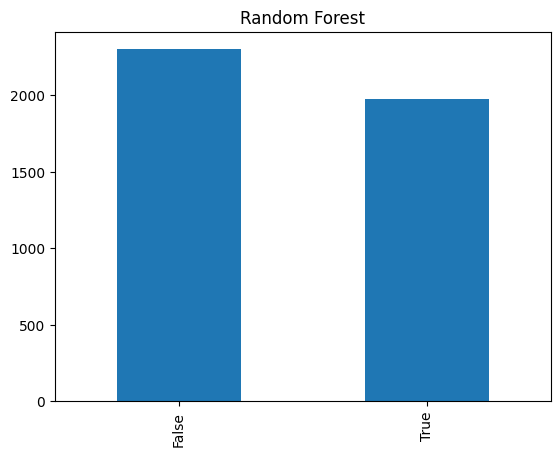

In [191]:
plot = result_df.Transported_rf.value_counts()
plot.plot(kind="bar", title = 'Random Forest')

In [176]:
print(plot)

False    2301
True     1976
Name: Transported_rf, dtype: int64


<Axes: title={'center': 'SVR'}>

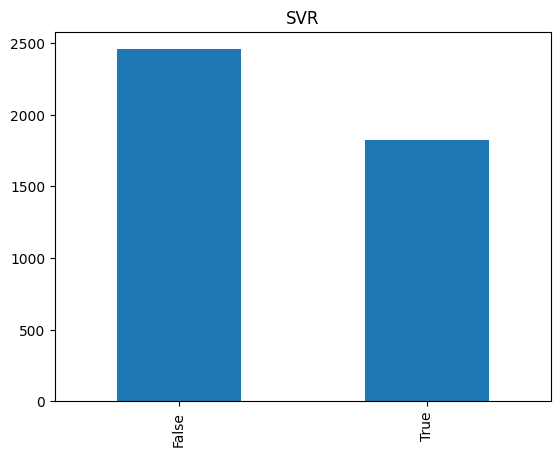

In [192]:
plot = result_df.Transported_svr.value_counts()
plot.plot(kind="bar", title = 'SVR')

In [178]:
print(plot)

False    2455
True     1822
Name: Transported_svr, dtype: int64


<Axes: title={'center': 'GBR'}>

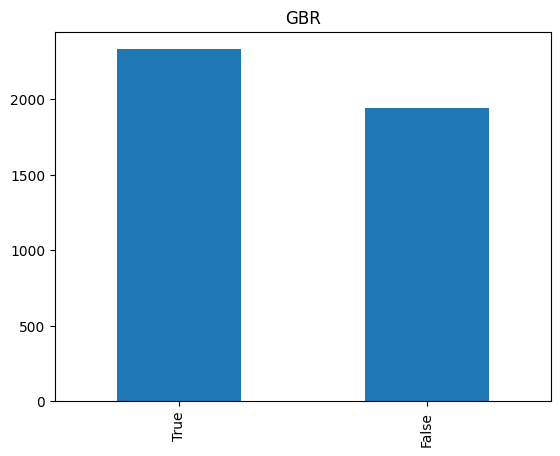

In [193]:
plot = result_df.Transported_gbr.value_counts()
plot.plot(kind="bar", title = 'GBR')

In [180]:
print(plot)

True     2331
False    1946
Name: Transported_gbr, dtype: int64


<Axes: title={'center': 'Regresión Lineal'}>

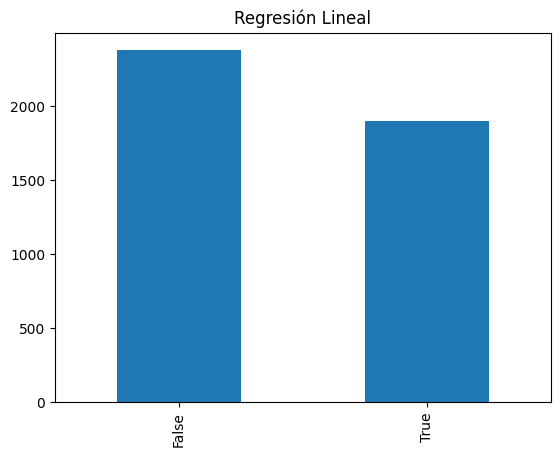

In [194]:
plot = result_df.Transported_lin.value_counts()
plot.plot(kind="bar", title = 'Regresión Lineal')

In [182]:
print(plot)

False    2375
True     1902
Name: Transported_lin, dtype: int64


#Análisis de resultados

Individualmente cada Modelo tardo menos de 10 segundos procesando los datos, por lo que considerando esto se puede decir que trabajaron de manera eficiente, aun así los datos entregados fueron valores entre 0 y 1, por lo que se aproximaron para trabajar con el criterio de verdadero y falso, puesto que es la respuesta necesaria para este contexto.

Adicionalmente se desea saber con certeza basandose en los cuatro modelos que pasajeros fueron o no transportados, por lo que se utilizará el siguiente criterio:
*   SI: a lo menos 3 modelos concuerdan que la persona fue transportada.
*   NO: a lo menos 3 modelos concuerdan que la perosna NO fue transportada.
*  VERIFICAR: 2 modelos platean que las persona fue transportada y los otros 2 que no, por lo que no se tiene certeza.

In [183]:
seguridad = [0]
for fil in range(result_df.shape[0]):
  temp = (int(int(result_df['Transported_gbr'][fil]) +
              int(result_df['Transported_svr'][fil]) +
              int(result_df['Transported_rf'][fil]) +
              int(result_df['Transported_lin'][fil])
              ))
  if temp == 0:
    seguridad.append('NO')
  elif temp >= 3:
    seguridad.append('SI')
  else:
    seguridad.append('Verificar')
seguridad.remove(0)
result_df['Transportado'] = seguridad
result_df.head()

,ID,Transported_rf,Transported_svr,Transported_gbr,Transported_lin,Transportado
0,0013_01,True,True,True,True,SI
1,0018_01,False,False,False,False,NO
2,0019_01,True,True,True,True,SI
3,0021_01,True,True,True,True,SI
4,0023_01,True,False,True,False,Verificar


<Axes: >

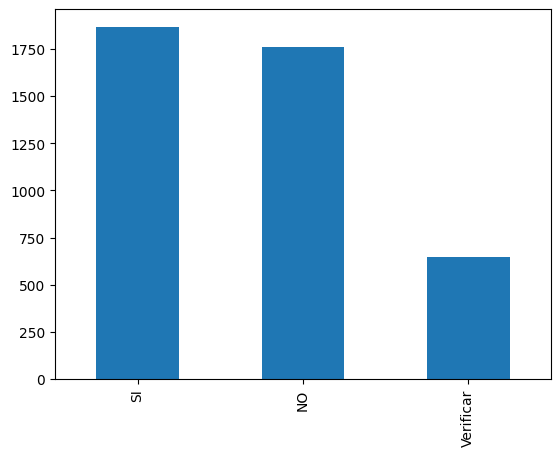

In [184]:
plot = result_df.Transportado.value_counts()
plot.plot(kind="bar")

In [186]:
print(plot)

SI           1868
NO           1764
Verificar     645
Name: Transportado, dtype: int64


#Conclusiones

Basandonos en el anaisis de los cuatro modelos en conjunto, y utilizando como criterio que a lo menos 3 modelos concuerden con su decisión, podemos reducir considerablemente la tarea de busqueda de personas transportadas.

Adicionalmente al análisis de los datos, se propone como solución extra a la problematica general dos posibles puntos de vistas relacionados directamente al caso:

*  A las personas que queden por verificar buscar su numero de asiento.
*  Relacionar directamente si las teletransportaciones están directamente relacionadas con la ubicación espacial de las personal al momento del incidente.